# Benchmarking Approximators for Shapley Interactions

In this example, we showcase how to use the `shapiq` package to benchmark different approximators for Shapley interactions.

In [1]:
import shapiq

shapiq.__version__

'0.1.0'

In [2]:
from shapiq.games.benchmark.benchmark_config import (
    load_games_from_configuration,
    print_benchmark_configurations,
)

In [3]:
# print all available games and benchmark configurations
print_benchmark_configurations()

Game: AdultCensusDataValuation
Player ID: 0
Number of Players: 15
Number of configurations: 2
Is the Benchmark Pre-computed: True
Iteration Parameter: random_state
Configurations:
Configuration 1: {'model_name': 'decision_tree', 'n_data_points': 15}
Configuration 2: {'model_name': 'random_forest', 'n_data_points': 15}

Game: AdultCensusDatasetValuation
Player ID: 0
Number of Players: 10
Number of configurations: 3
Is the Benchmark Pre-computed: True
Iteration Parameter: random_state
Configurations:
Configuration 1: {'model_name': 'decision_tree', 'player_sizes': 'increasing', 'n_players': 10}
Configuration 2: {'model_name': 'random_forest', 'player_sizes': 'increasing', 'n_players': 10}
Configuration 3: {'model_name': 'gradient_boosting', 'player_sizes': 'increasing', 'n_players': 10}
Player ID: 1
Number of Players: 14
Number of configurations: 1
Is the Benchmark Pre-computed: True
Iteration Parameter: random_state
Configurations:
Configuration 1: {'model_name': 'decision_tree', 'playe

## Run a SV Benchmark for a DataValuation Configuration
Here we show how to run a benchmark for the AdultCensusDataValuation game using the SV approximators.

In [4]:
# read these values from the configuration file / or the printed benchmark configurations
game_identifier = "AdultCensusDataValuation"
config_id = 1
n_player_id = 0

In [5]:
# load the game files from disk / or download
games = load_games_from_configuration(
    game_class=game_identifier, n_player_id=n_player_id, config_id=config_id
)
games = list(games)  # convert to list (the generator is consumed)
n_players = games[0].n_players
games[0]

Game(15 players, normalize=False, normalization_value=0.0, precomputed=True)

In [6]:
# get the approximators to evaluate
from shapiq.approximator import KernelSHAP, SVARM, PermutationSamplingSV  # sv approximators

sv_approximators = [
    KernelSHAP(n=n_players, random_state=42),
    SVARM(n=n_players, random_state=42),
    PermutationSamplingSV(n=n_players, random_state=42),
]

In [7]:
# get the index and order
index = "SV"
order = 1
save_path = "sv_benchmark_results.json"

In [8]:
# run the benchmark
from shapiq.games.benchmark.run import run_benchmark

results = run_benchmark(
    index=index,
    order=order,
    games=games,
    approximators=sv_approximators,
    save_path=save_path,
    # alternatively, you can set also max_budget (e.g. 10_000) and budget_step to 0.05 (in percentage of max_budget)
    budget_steps=[500, 1000, 2500, 5000, 10000, 20000, 2**n_players],
    rerun_if_exists=True,  # if True, the benchmark will rerun the approximators even if the results file exists
    n_jobs=6,  # number of parallel jobs
)

Computing the exact values for the games.


  0%|          | 0/10 [00:00<?, ? games/s]

Got 3 approximators for the benchmark.
All approximators: {1: [KernelSHAP(
    n=15,
    max_order=1,
    index=SII,
    top_order=False,
    random_state=42
), SVARM(
    n=15,
    max_order=1,
    index=SV,
    top_order=False,
    random_state=42
), PermutationSamplingSV(
    n=15,
    max_order=1,
    index=SV,
    top_order=False,
    random_state=42
)]}


Running benchmark::   0%|          | 0/210 [00:00<?, ? experiments/s]

Approximators: ['KernelSHAP', 'PermutationSamplingSV', 'SVARM']


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Model Evaluations (relative to $2^n$)', ylabel='MSE'>)

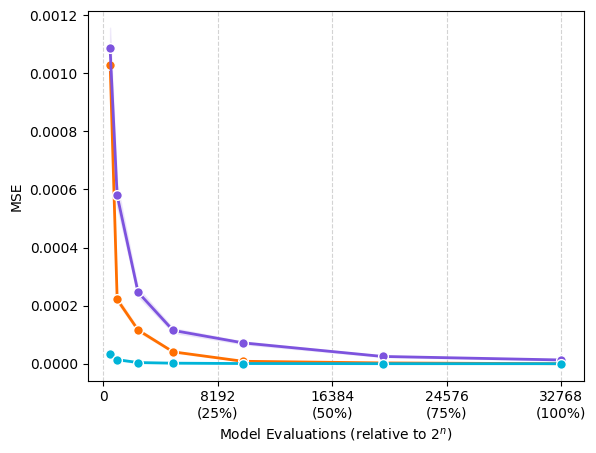

In [9]:
# plot the results
from shapiq.games.benchmark.plot import plot_approximation_quality

# colors in the plot: "KernelSHAP": orange, "SVARM": blue, "PermutationSamplingSV": purple
plot_approximation_quality(results)

## Run a SI Benchmark for a Local Explanation Configuration


In [10]:
# set index and order
index = "k-SII"
order = 2

In [11]:
# read these values from the configuration file / or the printed benchmark configurations
game_identifier = "SentimentAnalysisLocalXAI"  # explains the sentiment of a sentence
config_id = 1
n_player_id = 0
n_games = 10  # 30 are available

In [12]:
# load the game files from disk / or download
games = load_games_from_configuration(
    game_class=game_identifier, n_player_id=n_player_id, config_id=config_id, n_games=n_games
)
games = list(games)  # convert to list (the generator is consumed)
n_players = games[0].n_players
games[0]

Game(14 players, normalize=True, normalization_value=0.5675869584083557, precomputed=True)

In [13]:
# get the approximators to evaluate
from shapiq.approximator import KernelSHAPIQ, SVARMIQ, PermutationSamplingSII  # si approximators

si_approximators = [
    KernelSHAPIQ(n=n_players, index=index, max_order=order, random_state=42),
    SVARMIQ(n=n_players, index=index, max_order=order, random_state=42),
    PermutationSamplingSII(n=n_players, index=index, max_order=order, random_state=42),
]

In [14]:
# get the index and order
index = "k-SII"
order = 2
save_path = "si_benchmark_results.json"

In [15]:
# run the benchmark
from shapiq.games.benchmark.run import run_benchmark

results = run_benchmark(
    index=index,
    order=order,
    games=games,
    approximators=si_approximators,
    save_path=save_path,
    # alternatively, you can set also max_budget and budget_step
    budget_steps=[500, 1000, 2500, 5000, 10000, 2**n_players],
    rerun_if_exists=True,  # if True, the benchmark will rerun the approximators even if the results file exists
    n_jobs=6,  # number of parallel jobs
)

Computing the exact values for the games.


  0%|          | 0/10 [00:00<?, ? games/s]

Got 3 approximators for the benchmark.
All approximators: {1: [KernelSHAPIQ(
    n=14,
    max_order=2,
    index=k-SII,
    top_order=False,
    random_state=42
), SVARMIQ(
    n=14,
    max_order=2,
    index=k-SII,
    top_order=False,
    random_state=42
), PermutationSamplingSII(
    n=14,
    max_order=2,
    index=k-SII,
    top_order=False,
    random_state=42
)]}


Running benchmark::   0%|          | 0/180 [00:00<?, ? experiments/s]

Approximators: ['KernelSHAPIQ', 'PermutationSamplingSII', 'SVARMIQ']


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Model Evaluations (relative to $2^n$)', ylabel='MSE'>)

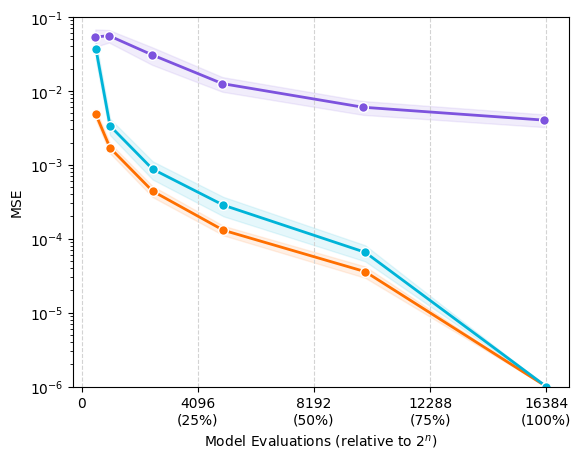

In [16]:
# plot the results
from shapiq.games.benchmark.plot import plot_approximation_quality

# colors in the plot: "KernelSHAPIQ": orange, "SVARMIQ": blue, "PermutationSamplingSII": purple
plot_approximation_quality(results, log_scale_y=True)